Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.
(http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

In [5]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_diabetes
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import train_test_split

from metrics import E


sns.set(rc={'figure.figsize': (10,8)})

D = load_diabetes()
df = pd.DataFrame(data=D.data, columns=D.feature_names).dropna()

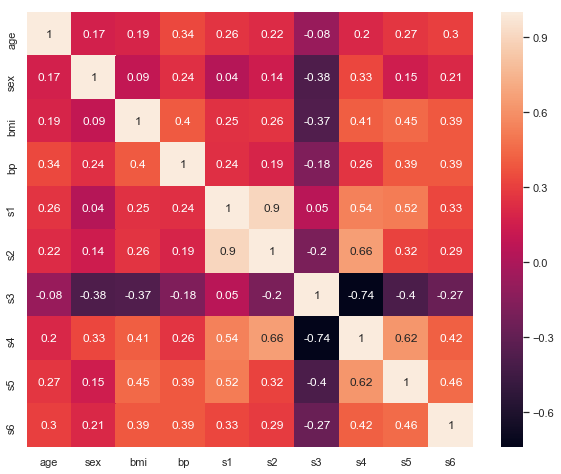

In [6]:
sns.heatmap(df.corr().round(2), annot=True)
plt.show()

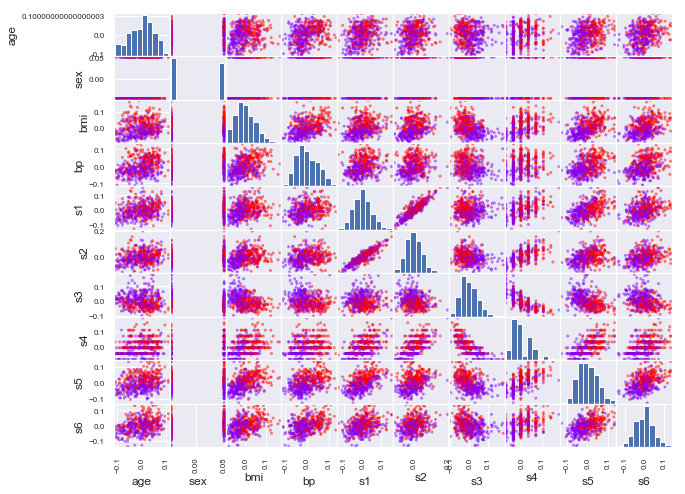

In [7]:
X = df.values
y = D.target

yt = Binarizer(threshold=y.mean(), copy=True)\
        .fit(y.reshape(-1, 1))\
        .transform(y.reshape(-1, 1)).reshape(1, -1)[0]

pd.plotting.scatter_matrix(df, c=yt, cmap='rainbow')
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(
    criterion='friedman_mse',
    splitter='best',
    max_depth=200,
    min_samples_split=50,
    min_samples_leaf=25,
    min_weight_fraction_leaf=0.0001,
    max_features=10,
    random_state=1,
    max_leaf_nodes=20,
    min_impurity_decrease=0.7,
    presort=True
)\
.fit(X_train, y_train)

E(model, X_train, X_test, y_train, y_test)

RMSE on test: 57.27198274015684
RMSE on train: 53.68088091389033
MSE on test: 3280.0800069888223
MSE on train: 2881.6369756912745
MAE on test: 44.984765738460624
MAE on train: 42.85398702252165
